#### Instalation

!pip install easyocr

!pip install torch torchvision torchaudio

#### Import Files

In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### Reading an Image

In [7]:
path='test1.jpg'

reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(path)
result

Using CPU. Note: This module is much faster with a GPU.


[([[311, 329], [337, 329], [337, 345], [311, 345]], 'AND', 0.2807275748638439),
 ([[330, 310], [568, 310], [568, 363], [330, 363]],
  'DL 7c0 1939',
  0.5543602047835834)]

In [5]:
len(result)

8

In [6]:
result[0]

([[32, 194], [66, 194], [66, 222], [32, 222]], 'SK', 0.9611940489765801)

#### Draw Result

In [14]:
top_left = tuple(result[1][0][0])
bottom_right = tuple(result[1][0][2])
text = result[1][1]
font = cv2.FONT_HERSHEY_SIMPLEX

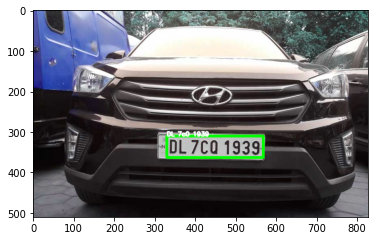

In [16]:
img = cv2.imread(path)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
img = cv2.putText(img,text,top_left,font,.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

#### Multiple Lines OCR

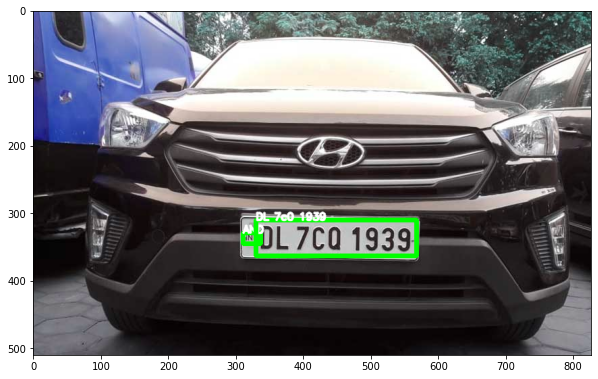

In [21]:
img = cv2.imread(path)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
    img = cv2.putText(img,text,top_left,font,.5,(255,255,255),2,cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()